In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт данных

In [7]:
# тренировочные данные
train_card_spending_df = pd.read_parquet('input_data/train_card_spending_df.parquet')
train_main_df = pd.read_parquet('input_data/train_main_df.parquet')
train_mcc_operations_df = pd.read_parquet('input_data/train_mcc_operations_df.parquet')
train_mcc_preferences_df = pd.read_parquet('input_data/train_mcc_preferences_df.parquet')
train_target = pd.read_csv('input_data/train_target.csv')

# Распределения данных target

In [4]:
train_target.head()

,target,id
0,0.00000,97678374
1,0.00000,62472650
2,219932.90625,94308112
3,631.77002,68994873
4,0.00000,78127603


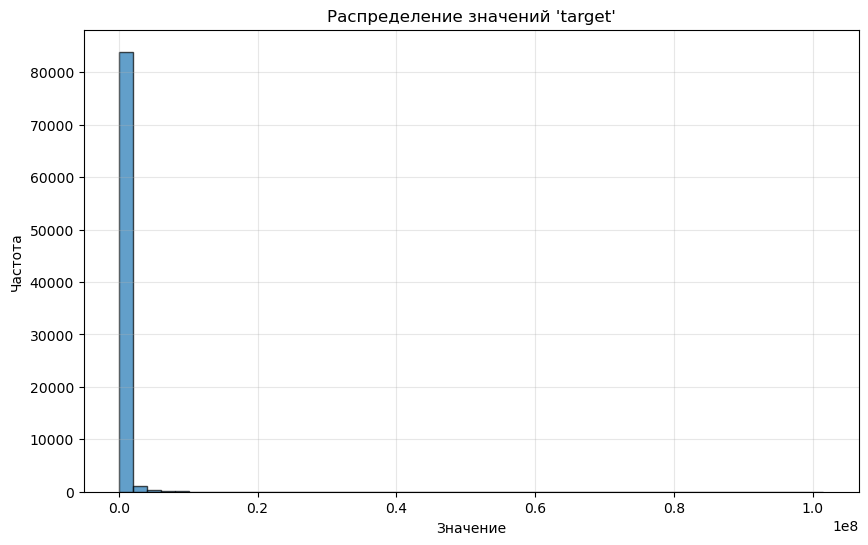

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(train_target['target'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Распределение значений 'target'")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

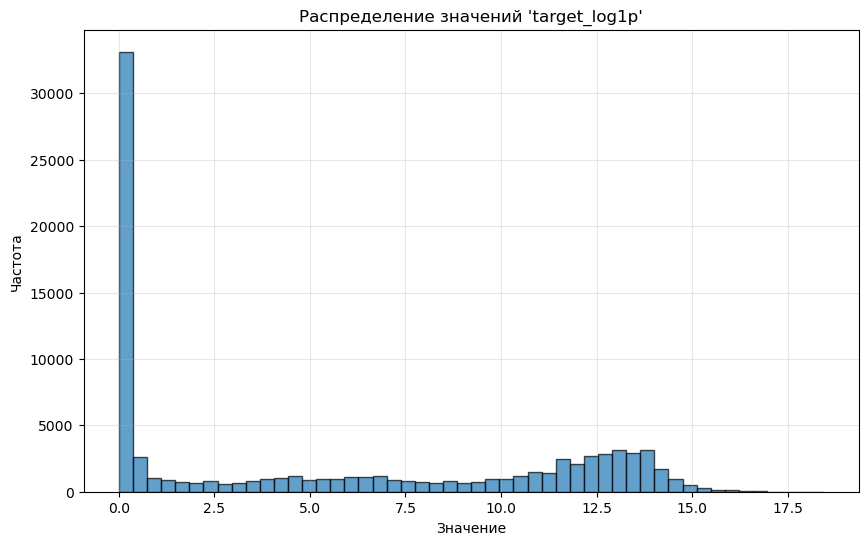

In [6]:
train_target_log1p = train_target.copy()
train_target_log1p['target'] = np.log1p(train_target_log1p['target'])

plt.figure(figsize=(10, 6))
plt.hist(train_target_log1p['target'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Распределение значений 'target_log1p'")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

# вывод: возьмем логарифм для более явного распределения (это распределение Пуассона)

# Очистка повторов id

In [7]:
# Было выяснено, что некоторые id в датасете повторяются. Необходимо продумать этот момент
train_target['id'].value_counts()

id
12039976    2
30775013    2
48717440    2
45299472    2
39341940    2
           ..
73859230    1
4020746     1
49174163    1
74793930    1
84261968    1
Name: count, Length: 85557, dtype: int64

In [9]:
train_target['index'] = train_target.index
train_main_df['index'] = train_main_df.index
train_card_spending_df['index'] = train_card_spending_df.index
train_mcc_operations_df['index'] = train_mcc_operations_df.index
train_mcc_preferences_df['index'] = train_mcc_preferences_df.index

# соединяем train_target, train_main_df
train_full_info = pd.merge(train_target, train_main_df, on=['id', 'index'])

,target,id,index,app_children_cnt,app_dependent_cnt,app_family_cnt,app_income_app,app_real_estate_ind,app_vehicle_ind,avg_dep_avg_balance_12month_amt,...,savings_sum_oms_debet_3m,savings_sum_oms_debet_6m,savings_sum_oms_debet_9m,savings_sum_oms_debet_12m,savings_service_model_cd,savings_pension_flg,savings_deposit_flg,savings_safe_acc_flg,savings_broker_flg,savings_oms_flg
0,0.00000,97678374,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.613216,0.000000,4.310414,75.214180,Массовый,0,0,1,0,0
1,0.00000,62472650,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.237672,0.000000,0.000000,0.000000,Массовый,0,0,1,0,0
2,219932.90625,94308112,2,0.0,0.0,0.0,105372.960938,0.0,0.0,315208.781250,...,0.000000,53.134129,90.025238,0.000000,Массовый,0,0,1,0,0
3,631.77002,68994873,3,1.0,0.0,3.0,0.000000,0.0,0.0,43187.953125,...,0.000000,22.276114,82.070015,117.386795,Массовый,0,0,1,0,0
4,0.00000,78127603,4,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.000000,0.000000,0.000000,33.072178,Массовый,0,0,1,0,0


In [10]:
train_full_info.shape

(85589, 282)

# Обработка nan (изучение вопроса с авто)

In [11]:
# найдем информацию о строках, где все значения равны nan
all_nan_rows = train_full_info.drop(['index', 'id'], axis=1).isna().all(axis=1)
all_nan_rows.unique()
# таких строк нет

array([False])

In [12]:
# изучение стастикики по nan
nan_count = train_full_info.isna().sum()
nan_count = nan_count[nan_count != 0]
print(nan_count.describe(), len(nan_count), sep='\n\n')

count      167.000000
mean     35591.401198
std      21883.277442
min          2.000000
25%      12681.000000
50%      47491.000000
75%      48347.000000
max      82778.000000
dtype: float64

167


In [13]:
nan_count.sort_values(ascending=False).head(30)

vehicle_counrty_type_nm                      82778
max_amt_foreign_cur_5y                       80425
max_amt_dep_6m                               74384
min_amt_term_g1y                             71895
max_amt_dep_act                              70708
avg_sum_nws2op                               70678
dep_avg_term_active                          70622
avg_dep_avg_balance_fact_1month_amt_term     70114
avg_dep_avg_balance_fact_3month_amt_term     69239
avg_dep_avg_balance_fact_6month_amt_term     68594
avg_dep_avg_balance_fact_12month_amt_term    65344
max_dep_avg_balance_3month_amt_term          58875
max_dep_avg_balance_12month_amt_term         58875
avg_dep_avg_balance_6month_amt_term          58875
max_dep_avg_balance_1month_amt_term          58875
avg_dep_avg_balance_3month_amt_term          58875
max_dep_avg_balance_6month_amt_term          58875
avg_dep_avg_balance_1month_amt_term          58875
max_max_dep_balance_amt_term                 58875
avg_dep_avg_balance_12month_amt

[nan  0. -1.  1.]


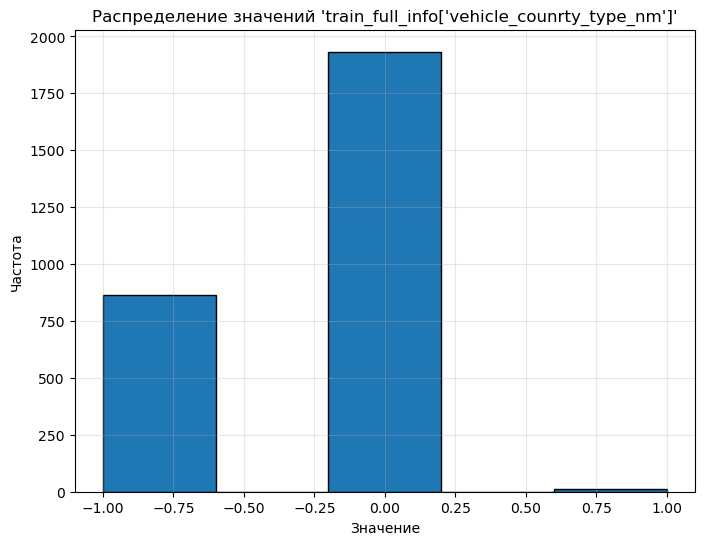

In [14]:
# изучаю отдельно колонку со страной авто. Что значит '-1'?
print(train_full_info['vehicle_counrty_type_nm'].unique())

plt.figure(figsize=(8, 6))
plt.hist(train_full_info['vehicle_counrty_type_nm'], bins=5, edgecolor='black')
plt.title("Распределение значений 'train_full_info['vehicle_counrty_type_nm']'")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

In [15]:
# изучаю отдельно колонку по флагу БУ авто
train_full_info['used_car_flg'].unique()

array([nan,  0.,  1.])

In [16]:
# изучаю отдельно колонку по наличию авто
train_full_info['app_vehicle_ind'].unique()

array([nan,  0.,  1.])

In [17]:
# смотрю возможную связь между страной авто и степень бу
pd.crosstab(train_full_info['used_car_flg'],
            train_full_info['vehicle_counrty_type_nm'],
            dropna=False)

vehicle_counrty_type_nm,-1.0,0.0,1.0,NaN
used_car_flg,,,,
0.0,783,1933,13,51352
1.0,82,0,0,127
NaN,0,0,0,31299


In [18]:
# смотрю связь между наличием авто и страной авто
pd.crosstab(train_full_info['app_vehicle_ind'],
            train_full_info['vehicle_counrty_type_nm'],
            dropna=False)

# вывод: train_full_info['app_vehicle_ind'] = 0 - авто есть

vehicle_counrty_type_nm,-1.0,0.0,1.0,NaN
app_vehicle_ind,,,,
0.0,865,1933,13,42609
1.0,0,0,0,8870
NaN,0,0,0,31299


In [19]:
# смотрю связь между наличием авто и степень БУ авто
pd.crosstab(train_full_info['app_vehicle_ind'], train_full_info['used_car_flg'],dropna=False)

# что значит app_vehicle_ind = 0 и used_car_flg = 0

used_car_flg,0.0,1.0,NaN
app_vehicle_ind,,,
0.0,45219,201,0
1.0,8862,8,0
NaN,0,0,31299


# Обработка nan (идея с масками)

In [20]:
# идея заполнения однотипных колонок по маске. Например
# avg_dep_avg_balance_fact_1month_amt_term
# avg_dep_avg_balance_fact_3month_amt_term
# avg_dep_avg_balance_fact_6month_amt_term
# avg_dep_avg_balance_fact_12month_amt_term
mask_avg_dep = train_full_info.columns.str.startswith('avg_dep_avg_balance_fact_')
train_full_info.loc[:, mask_avg_dep]

,avg_dep_avg_balance_fact_12month_amt,avg_dep_avg_balance_fact_12month_amt_term,avg_dep_avg_balance_fact_12month_amt_term_savings,avg_dep_avg_balance_fact_1month_amt,avg_dep_avg_balance_fact_1month_amt_term,avg_dep_avg_balance_fact_1month_amt_term_savings,avg_dep_avg_balance_fact_3month_amt,avg_dep_avg_balance_fact_3month_amt_term,avg_dep_avg_balance_fact_3month_amt_term_savings,avg_dep_avg_balance_fact_6month_amt,avg_dep_avg_balance_fact_6month_amt_term,avg_dep_avg_balance_fact_6month_amt_term_savings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,309654.687500,NaN,270938.531250,2.361041e+05,NaN,223885.281250,252199.156250,NaN,220784.671875,272355.750000,NaN,256579.359375
3,40596.726562,NaN,8509.054688,3.563191e+04,NaN,12180.728516,70369.773438,NaN,0.010000,32293.324219,NaN,0.010000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85584,18993.148438,NaN,11243.442383,1.000000e-02,NaN,NaN,16118.703125,NaN,NaN,11578.541992,NaN,NaN
85585,512705.843750,NaN,391223.687500,1.008943e+06,NaN,849837.125000,538205.000000,NaN,417256.906250,314204.375000,NaN,221242.531250
85586,0.010000,NaN,4017.337646,5.375557e+03,NaN,0.010000,0.010000,NaN,0.010000,146.118362,NaN,0.010000
85587,34164.445312,NaN,104371.109375,9.805445e+04,NaN,96988.632812,40026.886719,NaN,99420.460938,41653.195312,NaN,102322.781250


In [21]:
# проверка корреляции между похожими колонками
mask_avg_dep = train_full_info.columns.str.startswith('avg_dep_avg_balance_fact_')
train_full_info.loc[:, mask_avg_dep].corr(method='spearman')

,avg_dep_avg_balance_fact_12month_amt,avg_dep_avg_balance_fact_12month_amt_term,avg_dep_avg_balance_fact_12month_amt_term_savings,avg_dep_avg_balance_fact_1month_amt,avg_dep_avg_balance_fact_1month_amt_term,avg_dep_avg_balance_fact_1month_amt_term_savings,avg_dep_avg_balance_fact_3month_amt,avg_dep_avg_balance_fact_3month_amt_term,avg_dep_avg_balance_fact_3month_amt_term_savings,avg_dep_avg_balance_fact_6month_amt,avg_dep_avg_balance_fact_6month_amt_term,avg_dep_avg_balance_fact_6month_amt_term_savings
avg_dep_avg_balance_fact_12month_amt,1.000000,0.859138,0.945686,0.901775,0.865747,0.864579,0.924546,0.871866,0.884657,0.949498,0.876153,0.907890
avg_dep_avg_balance_fact_12month_amt_term,0.859138,1.000000,0.874632,0.776486,0.959196,0.772973,0.796358,0.969833,0.795335,0.813001,0.981008,0.815232
avg_dep_avg_balance_fact_12month_amt_term_savings,0.945686,0.874632,1.000000,0.853937,0.882379,0.897908,0.875813,0.889149,0.920571,0.899384,0.893803,0.944121
avg_dep_avg_balance_fact_1month_amt,0.901775,0.776486,0.853937,1.000000,0.905473,0.933869,0.963529,0.884007,0.919969,0.944170,0.863424,0.901467
avg_dep_avg_balance_fact_1month_amt_term,0.865747,0.959196,0.882379,0.905473,1.000000,0.923484,0.901745,0.992214,0.919529,0.890218,0.981420,0.907202
avg_dep_avg_balance_fact_1month_amt_term_savings,0.864579,0.772973,0.897908,0.933869,0.923484,1.000000,0.923231,0.896191,0.957929,0.904284,0.868367,0.939301
avg_dep_avg_balance_fact_3month_amt,0.924546,0.796358,0.875813,0.963529,0.901745,0.923231,1.000000,0.899641,0.936464,0.967383,0.882008,0.923691
avg_dep_avg_balance_fact_3month_amt_term,0.871866,0.969833,0.889149,0.884007,0.992214,0.896191,0.899641,1.000000,0.916079,0.895903,0.992835,0.913222
avg_dep_avg_balance_fact_3month_amt_term_savings,0.884657,0.795335,0.920571,0.919969,0.919529,0.957929,0.936464,0.916079,1.000000,0.924288,0.890866,0.961453
avg_dep_avg_balance_fact_6month_amt,0.949498,0.813001,0.899384,0.944170,0.890218,0.904284,0.967383,0.895903,0.924288,1.000000,0.892623,0.939401


In [22]:
# маска для zp_
mask_zp = train_full_info.columns.str.startswith('zp_')

#train_full_info.loc[:, mask_zp_]
#train_full_info.loc[:, mask_zp_].corr(method='spearman')

In [23]:
# маска для max_ min_ avg_ sum_
mask_agg = train_full_info.columns.str.startswith(('max_', 'min_', 'avg_', 'sum_'))

#train_full_info.loc[:, mask_max_min_avg]

In [24]:
# маска для dep_
mask_dep = train_full_info.columns.str.startswith('dep_')

#train_full_info.loc[:, mask_dep]

In [25]:
# маска для income_
mask_income = train_full_info.columns.str.startswith('income_')

#train_full_info.loc[:, mask_income]

In [26]:
# маска для сnt_
mask_cnt = train_full_info.columns.str.startswith('cnt_') & ~train_full_info.columns.isin(['cnt_prolong_max', 'cnt_prolong_max_5y'])
train_full_info.loc[:, mask_cnt]

,cnt_account_5y,cnt_dep_5y,cnt_dep_6m,cnt_dep_act,cnt_dep_closed_5y,cnt_early_withdraw_5y,cnt_foreign_cur_5y,cnt_grow_5y,cnt_manage_5y,cnt_save_5y,cnt_term_g1y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Обработка nan (изучение оставшихся характеристик)

In [27]:
# повторное изучение стастикики по nan
nan_count = train_full_info.isna().sum()
nan_count = nan_count[nan_count != 0]
print(nan_count.describe(), len(nan_count), nan_count, sep='\n\n')

count      167.000000
mean     35591.401198
std      21883.277442
min          2.000000
25%      12681.000000
50%      47491.000000
75%      48347.000000
max      82778.000000
dtype: float64

167

app_children_cnt          43258
app_dependent_cnt         48286
app_family_cnt            45661
app_income_app            46375
app_real_estate_ind       31299
                          ...  
zp_mean_24month           48347
zp_all_mean_24month       48347
zp_region_mean_24month    48347
zp_payments_24month       48347
zp_inputs_all_24month     48347
Length: 167, dtype: int64


In [46]:
# матрица корреляций
corr_matrix = train_full_info.select_dtypes(include=['number']).corr()
corr_matrix.loc['']

,target,id,index,app_children_cnt,app_dependent_cnt,app_family_cnt,app_income_app,app_vehicle_ind,avg_dep_avg_balance_12month_amt,avg_dep_avg_balance_12month_amt_term,...,savings_sum_oms_debet_1m,savings_sum_oms_debet_3m,savings_sum_oms_debet_6m,savings_sum_oms_debet_9m,savings_sum_oms_debet_12m,savings_pension_flg,savings_deposit_flg,savings_safe_acc_flg,savings_broker_flg,savings_oms_flg
target,1.000000,-0.002076,0.001542,-0.001293,-0.001362,0.004068,0.039029,0.012664,0.087313,0.011192,...,0.005779,0.006450,0.006586,0.005676,0.005170,0.010135,0.002110,NaN,0.025220,0.011683
id,-0.002076,1.000000,0.002699,-0.006900,-0.001249,0.000750,0.000930,-0.000753,-0.000065,0.000498,...,0.003022,0.001837,0.001144,0.001559,0.002103,0.003394,-0.001941,NaN,-0.003627,0.002233
index,0.001542,0.002699,1.000000,-0.002292,-0.001733,-0.005851,-0.000624,-0.008479,-0.004216,-0.003726,...,-0.001817,-0.000910,-0.000988,-0.002161,-0.003896,0.005474,-0.009601,NaN,0.000789,0.002788
app_children_cnt,-0.001293,-0.006900,-0.002292,1.000000,0.730642,0.626978,0.072589,0.023044,0.004347,0.002934,...,0.005588,0.002856,0.001364,0.000184,-0.000460,0.003048,-0.068826,NaN,0.045039,0.018970
app_dependent_cnt,-0.001362,-0.001249,-0.001733,0.730642,1.000000,0.564445,0.070908,0.040277,0.006250,0.004955,...,0.002795,0.001477,0.000439,-0.000088,-0.000300,0.002972,-0.059959,NaN,0.040896,0.016267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
savings_pension_flg,0.010135,0.003394,0.005474,0.003048,0.002972,-0.015087,-0.017682,0.006076,-0.003896,-0.005766,...,-0.003359,-0.003522,-0.003645,-0.003662,-0.003430,1.000000,0.098780,NaN,0.023967,0.001434
savings_deposit_flg,0.002110,-0.001941,-0.009601,-0.068826,-0.059959,-0.029308,0.006342,-0.016093,0.132528,0.117287,...,0.017017,0.018617,0.018774,0.019524,0.019016,0.098780,1.000000,NaN,0.071705,0.022076
savings_safe_acc_flg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
savings_broker_flg,0.025220,-0.003627,0.000789,0.045039,0.040896,0.027415,0.050543,0.001919,0.066480,0.058420,...,0.021169,0.023283,0.022981,0.022689,0.021062,0.023967,0.071705,NaN,1.000000,0.083063


In [29]:
# проверяю корреляцию cnt_prolong_max и cnt_prolong_max_5y с другими характеристиками
corr_matrix_dea = corr_matrix.loc[['cnt_prolong_max', 'cnt_prolong_max_5y'], :]
corr_matrix_dea = corr_matrix_dea.loc[: , (corr_matrix_dea.abs() > 0.5).any(axis=0)]
corr_matrix_dea

# вывод: cnt_prolong_max (макс кол-во пролонгаций по всем срочным депозитам) неплохо коррелирует с
# dep_max_d_term (макс срок срочного вклада) и max_term (макс срок договора)

,cnt_prolong_max,cnt_prolong_max_5y,dep_avg_term_closed,dep_max_d_term,max_term
cnt_prolong_max,1.000000,0.451867,0.520674,0.638473,0.661012
cnt_prolong_max_5y,0.451867,1.000000,0.168206,0.240381,0.257263


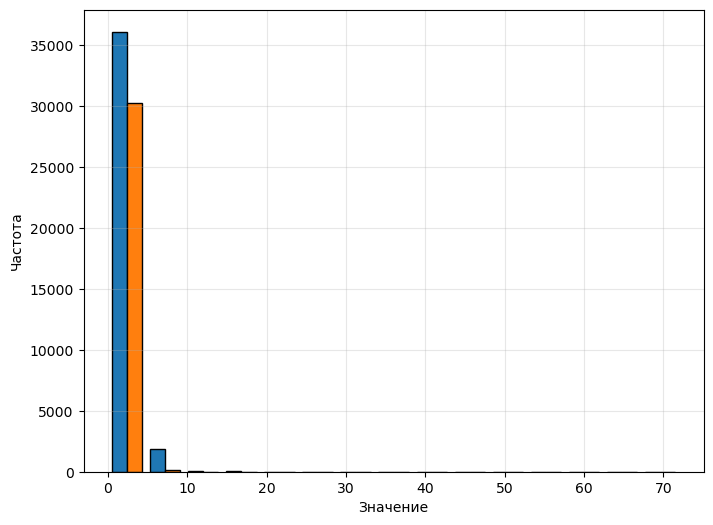

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(train_full_info[['cnt_prolong_max', 'cnt_prolong_max_5y']], bins=15, edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()

In [31]:
print(train_full_info[['cnt_prolong_max', 'cnt_prolong_max_5y']].mean(),
      train_full_info[['cnt_prolong_max', 'cnt_prolong_max_5y']].median(),
      sep='\n')

cnt_prolong_max       1.452596
cnt_prolong_max_5y    0.744817
dtype: float64
cnt_prolong_max       1.0
cnt_prolong_max_5y    1.0
dtype: float64


In [32]:
train_full_info['cnt_prolong_max'].value_counts()

# вывод: требуется написание функции, для cnt_prolong_max которая бы ставила 0, 1, 2 на основании значения
# dep_max_d_term (макс срок срочного вклада) и max_term (макс срок договора) для cnt_prolong_max
# А cnt_prolong_max_5y обработать на основании cnt_prolong_max

cnt_prolong_max
0.0     11575
1.0     10780
2.0     10579
3.0      1874
4.0      1268
5.0       963
6.0       571
7.0       212
8.0        82
9.0        76
10.0       26
11.0       25
13.0       20
12.0       10
15.0        9
19.0        6
14.0        4
17.0        4
16.0        3
21.0        3
18.0        2
27.0        1
25.0        1
24.0        1
72.0        1
20.0        1
41.0        1
Name: count, dtype: int64

In [45]:
np.round(train_full_info['max_term']).dropna().value_counts()

max_term
12.0     51728
6.0       4531
5.0       3227
17.0      1952
13.0      1877
         ...  
154.0        1
141.0        1
117.0        1
172.0        1
152.0        1
Name: count, Length: 144, dtype: int64

In [34]:
train_full_info[['cnt_prolong_max', 'cnt_prolong_max_5y', 'dep_max_d_term', 'max_term']].dropna(thresh=3, axis=0)

,cnt_prolong_max,cnt_prolong_max_5y,dep_max_d_term,max_term
8,0.0,0.0,12.642730,11.996617
10,2.0,2.0,9.125578,8.993169
11,2.0,NaN,9.095088,9.007381
15,5.0,1.0,60.187679,60.004166
17,0.0,0.0,2.997238,1.990478
...,...,...,...,...
85570,2.0,1.0,48.158340,47.996674
85573,1.0,0.0,11.867442,11.001929
85574,2.0,2.0,38.974812,38.005405
85576,6.0,5.0,36.689350,36.005657


In [ ]:
(train_full_info[['cnt_prolong_max', 'max_term']]
 .dropna(thresh=2, axis=0)
 .drop_duplicates('cnt_prolong_max')
 .head(27)
 .sort_values(by='cnt_prolong_max'))

In [ ]:
# Ручное разбиение на интервалы
bins = [0, 20, 50, 100, 200, 250]
labels = ['0-20', '20-50', '50-100', '100-200', '200+']
train_full_info['max_term_category'] = pd.cut(train_full_info['max_term'], bins=bins, labels=labels)

# Медианные значения для категорий
median_values = train_full_info.groupby('max_term_category')['cnt_prolong_max'].median().to_dict()
print("Медианные значения:", median_values)

# Визуализация
import matplotlib.pyplot as plt
plt.scatter(train_full_info['max_term'], train_full_info['cnt_prolong_max'], c=pd.factorize(train_full_info['max_term_category'])[0], cmap='viridis')
plt.xlabel('max_term')
plt.ylabel('cnt_prolong_max')
plt.colorbar(label='Category')
plt.show()

In [35]:
# изучаю корреляции по количеству/детей/иждивенцев/членов семьи и доход клиента
corr_matrix_dea = corr_matrix.loc[['app_children_cnt', 'app_dependent_cnt', 'app_family_cnt', 'app_income_app'], :]
corr_matrix_dea = corr_matrix_dea.loc[: , (corr_matrix_dea.abs() > 0.5).any(axis=0)]
corr_matrix_dea

# вывод: попробовать связать значения app_income_app с income_unverified/income_verified/income_verified_primary_job

,app_children_cnt,app_dependent_cnt,app_family_cnt,app_income_app,income_unverified,income_verified,income_verified_primary_job
app_children_cnt,1.000000,0.718905,0.611350,0.044116,0.017201,0.048851,0.050637
app_dependent_cnt,0.718905,1.000000,0.535279,0.037318,0.022252,0.031801,0.032972
app_family_cnt,0.611350,0.535279,1.000000,0.026093,0.013972,0.024156,0.024755
app_income_app,0.044116,0.037318,0.026093,1.000000,0.775196,0.628141,0.625921


In [36]:
# Изучаю app_real_estate_ind
train_full_info['app_real_estate_ind'] = train_full_info['app_real_estate_ind'].astype('float64')
corr_matrix_dea = corr_matrix.loc[['app_real_estate_ind'], :]
corr_matrix_dea = corr_matrix_dea.loc[: , (corr_matrix_dea.abs() > 0.5).any(axis=0)]

train_full_info['app_real_estate_ind'] = train_full_info['app_real_estate_ind'].astype('object')

corr_matrix_dea

,app_real_estate_ind
app_real_estate_ind,1.0


D:\.Distrib\anaconda3\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\.Distrib\anaconda3\Lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


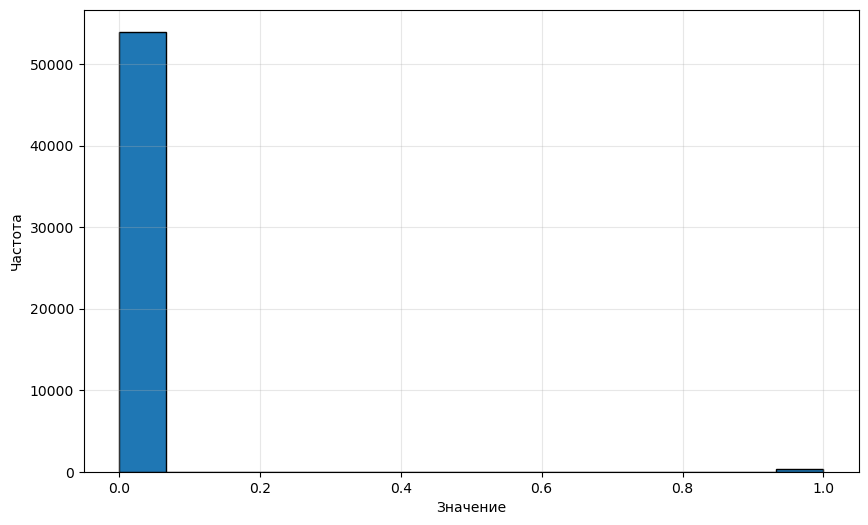

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(train_full_info['app_real_estate_ind'], bins=15, edgecolor='black',)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid(alpha=0.3)
plt.show()
# вывод: train_full_info['app_real_estate_ind'] можно пока заменить на 0

In [38]:
# Заполнение app_real_estate_ind (наличие недвижимости)
train_full_info['app_real_estate_ind'] = train_full_info['app_real_estate_ind'].fillna('0')

# Заполнение оставшихся пропусков (требуется детальное рассмотрение в будущем)
nan_count = train_full_info.isna().sum()
nan_count = nan_count[nan_count != 0].index
cols_to_fill = nan_count
train_full_info[cols_to_fill] = train_full_info[cols_to_fill].fillna(train_full_info[cols_to_fill].median())

# Обработка категориальных данных

In [39]:
train_full_info.select_dtypes(include=['object']).columns

Index(['app_real_estate_ind', 'brand_nm', 'current_work_experience_nm',
       'gender_nm', 'industry_nm', 'marital_status_nm', 'salary_flg',
       'total_work_experience_nm', 'savings_service_model_cd'],
      dtype='object')

In [40]:
train_full_info['savings_service_model_cd'].unique()

array(['Массовый', 'Привилегия', 'VIP'], dtype=object)

In [41]:
# Удалим две наиболее разносторонние категориальные колонки
train_full_info = train_full_info.drop(['brand_nm', 'industry_nm'], axis=1)

In [42]:
cat_columns = train_full_info.select_dtypes(include=['object']).columns

train_encoded = pd.get_dummies(
    train_full_info,
    columns=cat_columns,
    prefix=cat_columns,
    drop_first=True  # избегаем дамми-ловушку
).astype('float64')

test_encoded = pd.get_dummies(
    #train_full_info,
    columns=cat_columns,
    prefix=cat_columns,
    drop_first=True  # избегаем дамми-ловушку
).astype('float64')

TypeError: get_dummies() missing 1 required positional argument: 'data'

In [ ]:
train_encoded

In [ ]:
#train_encoded.to_csv('processed_data.csv', index=False)

In [ ]:
#train_encoded.to_csv('test_data.csv', index=False)

In [ ]:
# вывод: 'app_real_estate_ind' ни с чем особо из Main не коррелирует. Большая часть известных значений - 0.
# train_full_info['app_real_estate_ind'] можно пока заменить на 0

# Заполнение app_real_estate_ind (наличие недвижимости)
train_full_info['app_real_estate_ind'] = train_full_info['app_real_estate_ind'].fillna('0')

corr_matrix = train_full_info.select_dtypes(include=['number']).corr()

corr_matrix_dea = corr_matrix.loc[['app_children_cnt', 'app_dependent_cnt', 'app_family_cnt'], :]
corr_matrix_dea.loc[:, (corr_matrix_dea.abs() > 0.5).any()]
# вывод: кол-во детей, иждивинцев, членов семьи связано

train_full_info[['app_children_cnt', 'app_dependent_cnt', 'app_family_cnt']].dropna(thresh=2).head(10)


In [ ]:
# Изучаю распределение для каждого знаения cnt_prolong_max
(train_full_info[['cnt_prolong_max', 'max_term']]
 .dropna(thresh=2, axis=0)
 #.drop_duplicates('cnt_prolong_max')
 [train_full_info['cnt_prolong_max'] == 2]
 .describe()
 )

# Другие таблицы

In [4]:
train_main_df

,app_children_cnt,app_dependent_cnt,app_family_cnt,app_income_app,app_real_estate_ind,app_vehicle_ind,avg_dep_avg_balance_12month_amt,avg_dep_avg_balance_12month_amt_term,avg_dep_avg_balance_12month_amt_term_savings,avg_dep_avg_balance_1month_amt,...,savings_sum_oms_debet_6m,savings_sum_oms_debet_9m,savings_sum_oms_debet_12m,savings_service_model_cd,savings_pension_flg,savings_deposit_flg,savings_safe_acc_flg,savings_broker_flg,savings_oms_flg,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4027.373535,NaN,...,0.000000,4.310414,75.214180,Массовый,0,0,1,0,0,97678374
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,Массовый,0,0,1,0,0,62472650
2,0.0,0.0,0.0,105372.960938,0.0,0.0,315208.781250,NaN,274816.375000,2.356619e+05,...,53.134129,90.025238,0.000000,Массовый,0,0,1,0,0,94308112
3,1.0,0.0,3.0,0.000000,0.0,0.0,43187.953125,NaN,5277.233887,2.844051e+04,...,22.276114,82.070015,117.386795,Массовый,0,0,1,0,0,68994873
4,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,33.072178,Массовый,0,0,1,0,0,78127603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,0.0,0.0,1.0,50792.054688,0.0,0.0,14605.051758,NaN,6170.456055,6.814772e+03,...,0.000000,73.875885,0.000000,Массовый,0,0,1,0,0,6163462
85585,0.0,0.0,1.0,410333.093750,0.0,0.0,510666.125000,NaN,397536.968750,1.012610e+06,...,0.000000,0.000000,2.739857,Привилегия,0,0,1,0,0,22320709
85586,1.0,1.0,2.0,78396.578125,0.0,1.0,4456.615723,NaN,0.000000,0.000000e+00,...,0.000000,50.728161,0.000000,Массовый,0,0,1,0,0,23863045
85587,NaN,NaN,NaN,NaN,NaN,NaN,3737.191895,NaN,433.325165,8.750564e+04,...,0.000000,0.000000,99.994492,Массовый,0,0,1,0,0,33408678


In [21]:
train_card_spending_df

,cat_maxspend_v1_1,cat_maxspend_v1_12,cat_maxspend_v1_3,cat_maxspend_v1_6,cat_maxspend_v2_1,cat_maxspend_v2_12,cat_maxspend_v2_3,cat_maxspend_v2_6,cc_avg_trns_12m,cc_avg_trns_1m,...,sum_tr_travel_agencies_6,sum_tr_trip_12m,sum_tr_trip_1m,sum_tr_trip_3m,sum_tr_trip_6m,sum_tr_unknown_1,sum_tr_unknown_12,sum_tr_unknown_3,sum_tr_unknown_6,id
0,None,None,None,None,None,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97678374
1,None,None,None,None,None,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62472650
2,LEISURE GOODS RETAIL,MEDICAL/HEALTH SERVICES,LEISURE GOODS RETAIL,LEISURE GOODS RETAIL,LEISURE GOODS RETAIL,MEDICAL/HEALTH SERVICES,LEISURE GOODS RETAIL,LEISURE GOODS RETAIL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94308112
3,None,None,None,None,None,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20259.037109,53401.761719,19749.404297,25131.312500,68994873
4,None,None,None,None,None,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78127603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,None,FASHION RETAIL,RESTAURANTS,RESTAURANTS,None,FASHION RETAIL,RESTAURANTS,RESTAURANTS,-1.000000,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6163462
85585,TRANSPORTATION_TAXI,RESTAURANTS_FASTFOOD,RESTAURANTS_FASTFOOD,RESTAURANTS_FASTFOOD,TRANSPORTATION_TAXI,RESTAURANTS_FASTFOOD,RESTAURANTS_FASTFOOD,RESTAURANTS_FASTFOOD,-1.000000,1.031723,...,NaN,30356.042969,NaN,356.037262,305.477936,NaN,4677.253906,NaN,NaN,22320709
85586,None,None,None,None,None,None,None,None,3649.797119,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23863045
85587,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,CONSTRUCTION SERVICES,0.484486,1.329401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33408678


In [22]:
train_mcc_operations_df

,cnt_most_popular_mcc_1711_12m,cnt_most_popular_mcc_1711_1m,cnt_most_popular_mcc_1711_3m,cnt_most_popular_mcc_1711_6m,cnt_most_popular_mcc_1731_12m,cnt_most_popular_mcc_1731_1m,cnt_most_popular_mcc_1731_3m,cnt_most_popular_mcc_1731_6m,cnt_most_popular_mcc_1799_12m,cnt_most_popular_mcc_1799_1m,...,sum_most_popular_mcc_9311_6m,sum_most_popular_mcc_9399_12m,sum_most_popular_mcc_9399_1m,sum_most_popular_mcc_9399_3m,sum_most_popular_mcc_9399_6m,sum_most_popular_mcc_9402_12m,sum_most_popular_mcc_9402_1m,sum_most_popular_mcc_9402_3m,sum_most_popular_mcc_9402_6m,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97678374
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62472650
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94308112
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2641.953369,NaN,NaN,2626.929199,93.464630,NaN,NaN,100.739586,68994873
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78127603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6163462
85585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,671.106995,NaN,294.3172,296.081909,NaN,NaN,NaN,NaN,22320709
85586,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23863045
85587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33408678


In [5]:
train_mcc_preferences_df

,preferences_div_cnt_tr_MCC_code_742_1m,preferences_div_cnt_tr_MCC_code_780_1m,preferences_div_cnt_tr_MCC_code_1711_1m,preferences_div_cnt_tr_MCC_code_1731_1m,preferences_div_cnt_tr_MCC_code_1799_1m,preferences_div_cnt_tr_MCC_code_2741_1m,preferences_div_cnt_tr_MCC_code_3011_1m,preferences_div_cnt_tr_MCC_code_4111_1m,preferences_div_cnt_tr_MCC_code_4112_1m,preferences_div_cnt_tr_MCC_code_4121_1m,...,preferences_div_sum_tr_cat_tax_govt_services_12m,preferences_div_sum_tr_cat_telecommunication_12m,preferences_div_sum_tr_cat_tobacco_retail_12m,preferences_div_sum_tr_cat_toy_retail_12m,preferences_div_sum_tr_cat_transportation_other_12m,preferences_div_sum_tr_cat_transportation_rzd_12m,preferences_div_sum_tr_cat_transportation_taxi_12m,preferences_div_sum_tr_cat_travel_agencies_12m,preferences_div_sum_tr_cat_unknown_12m,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97678374
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62472650
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.026841,0.000000,0.000006,0.000025,0.000009,0.015398,0.000000,0.000000,94308112
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.005689,0.010788,0.000011,0.000000,0.000096,0.000000,0.000000,0.000004,0.076318,68994873
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78127603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.135032,0.001523,0.000011,0.021812,0.000000,0.000017,0.000000,0.000088,6163462
85585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.157895,...,0.000579,0.002220,0.000097,0.015241,0.003983,0.000000,0.015333,0.000686,0.000620,22320709
85586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000022,0.000000,0.000006,0.000004,0.000000,0.000000,0.000009,0.000007,0.000000,23863045
85587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.074434,0.000000,0.018120,0.000005,0.000003,0.000009,0.000004,33408678


In [5]:
train_main_df[['avg_dep_avg_balance_12month_amt', 'min_max_dep_balance_amt', 'sum_amount_zp_12m',
                   'savings_sum_dep_12m', 'savings_sum_sa_now', 'savings_sum_sa_12m',
                   'savings_sum_sa_credit_1m', 'savings_sum_sa_credit_12m']].agg(['mean', 'max', 'min'])

,avg_dep_avg_balance_12month_amt,min_max_dep_balance_amt,sum_amount_zp_12m,savings_sum_dep_12m,savings_sum_sa_now,savings_sum_sa_12m,savings_sum_sa_credit_1m,savings_sum_sa_credit_12m
mean,1.034832e+06,1.970863e+05,1.014401e+06,8.481544e+04,2.875136e+05,2.808353e+05,7.182265e+04,6.432367e+05
max,1.233485e+09,3.575353e+08,9.279012e+08,2.568604e+08,1.019098e+08,1.277615e+08,8.073542e+07,7.481536e+08
min,3.000000e-05,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [7]:
train_target.agg(['mean', 'max', 'min'])

,target,id
mean,2.347625e+05,5.001274e+07
max,1.015605e+08,9.999874e+07
min,0.000000e+00,8.100000e+01


In [17]:
income_columns = ['app_income_app', 'income_verified', 'income_verified_primary_job', 'income_unverified']
train_full_info[income_columns].dropna(thresh=4).head(10)

,app_income_app,income_verified,income_verified_primary_job,income_unverified
2,105372.960938,106076.906250,104224.382812,159.007492
3,0.000000,631.288635,0.000000,23.733812
5,26904.433594,26173.880859,25919.302734,0.000000
6,98499.656250,99265.968750,99286.156250,0.000000
7,51601.230469,48454.519531,51466.089844,88.390167
8,80143.890625,78442.468750,78873.171875,0.000000
11,235907.078125,233963.281250,233864.937500,0.000000
12,62818.480469,61697.394531,61851.847656,157.446381
13,81700.992188,54101.441406,54836.464844,25041.867188
16,177145.187500,145401.171875,144743.187500,30058.400391


In [22]:
train_main_df[train_main_df['id'] == 12039976].dropna(axis=1).T

,10893,55025
avg_dep_avg_balance_12month_amt,7784.149414,3788234.0
avg_dep_avg_balance_12month_amt_term_savings,0.0,3801863.75
avg_dep_avg_balance_1month_amt,4533.266113,2984567.75
avg_dep_avg_balance_1month_amt_term_savings,0.0,2981169.0
avg_dep_avg_balance_3month_amt,2528.572998,2965722.0
...,...,...
savings_safe_acc_flg,1,1
savings_broker_flg,0,0
savings_oms_flg,0,0
id,12039976,12039976
